In [1]:
import matplotlib.pyplot as plt
from rank import RANK
from tank import TANK
import numpy as np
import params

np.set_printoptions(suppress=True, precision=10, linewidth=250)
plt.style.use('default')
plt.rcParams.update({
    # "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

In [2]:
# initialize
rank = RANK(params)
tank = TANK(params)

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 4.76837158203125e-07
  warnings.warn(f'LTI did not converge. Error: {err}')
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 3.814697265625e-06
  warnings.warn(f'LTI did not converge. Error: {err}')


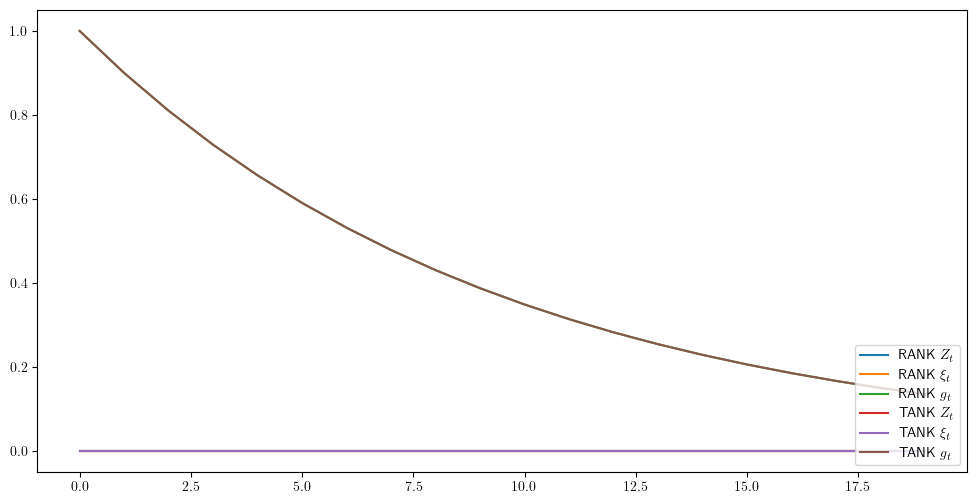

In [3]:
## IRFS
# params
T = 20
i = 2

# rank variables
# 0: W, 1: Y, 2: C, 3: N, 4: G, 5: Lambda, 6: pi, 7: PA, 8: PB, 9: I, 10: R, 11: Z, 12: xi, 13: g
rank_show = [11, 12, 13]

# tank variables
# 0: W, 1: Y, 2: CH, 3: CS, 4: N, 5: LH, 6: LS, 7: BS, 8: G, 9: T, 10: Lambda, 11: pi, 12: PA, 13: PB, 14: I, 15: R, 16: Z, 17: xi, 18: g
tank_show = [17, 18, 19]

# run irf
rank_irf = rank.run_impulse_response(T, i)
tank_irf = tank.run_impulse_response(T, i)

# plot
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)

ax.plot(rank_irf.T[:, rank_show], label=RANK.LABELS[rank_show])
ax.plot(tank_irf.T[:, tank_show], label=TANK.LABELS[tank_show])

ax.legend(loc='lower right')

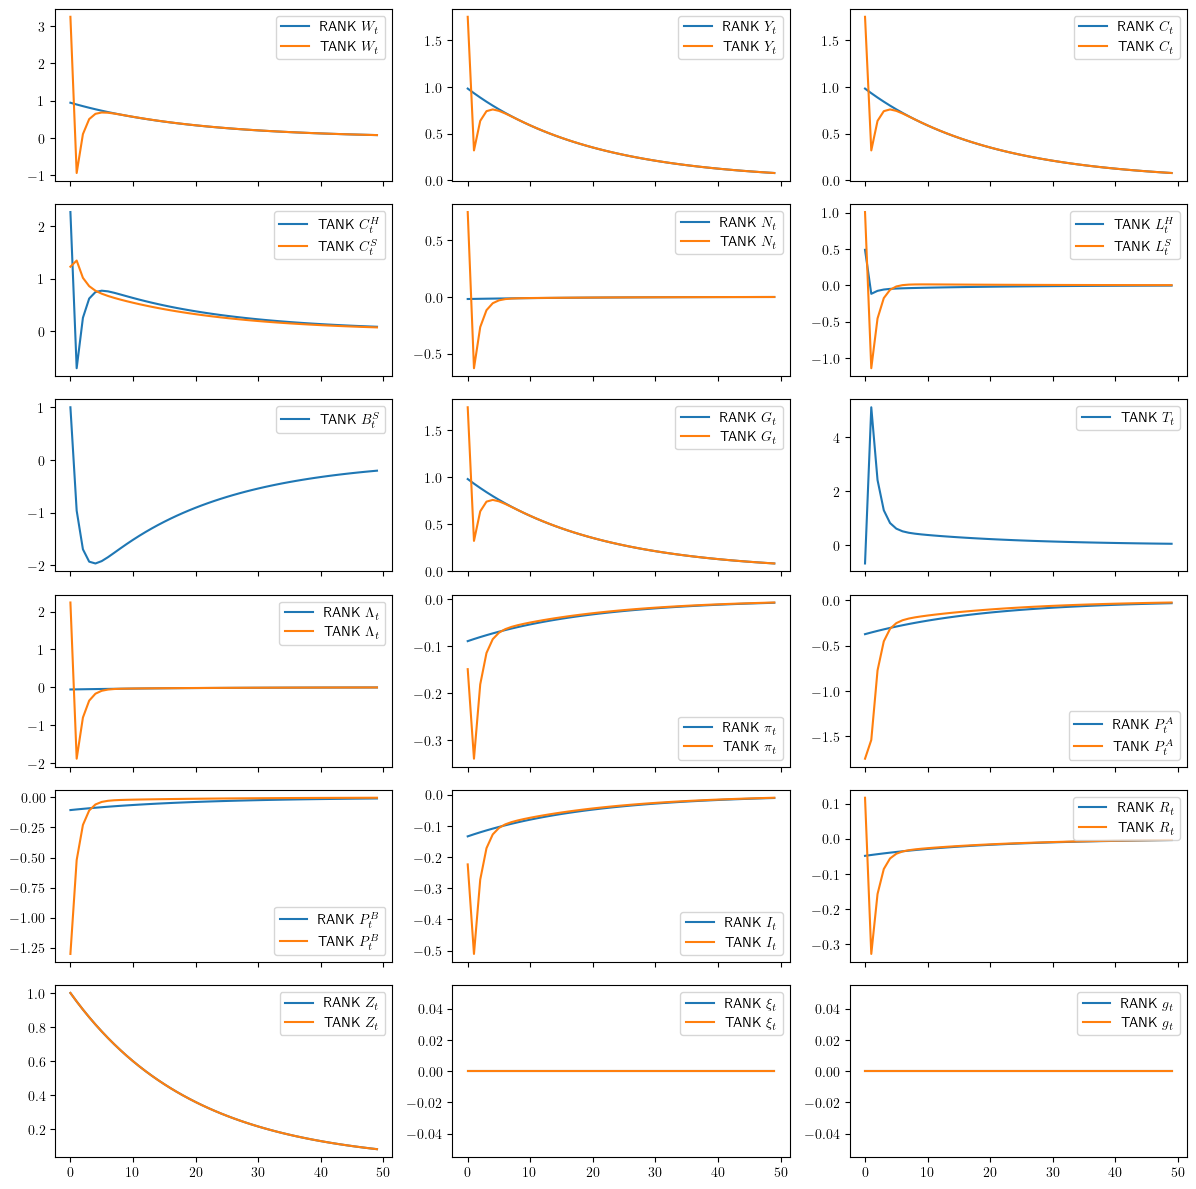

In [4]:
## IRFS
# params
T = 50
i = 0

# rank variables
# 0: W, 1: Y, 2: C, 3: N, 4: G, 5: Lambda, 6: pi, 7: PA, 8: PB, 9: I, 10: R, 11: Z, 12: xi, 13: g
rank_show = [0, 1, 2, [], 3, [], [], 4, [], 5, 6, 7, 8, 9, 10, 11, 12, 13]

# tank variables
# 0: W, 1: Y, 2: C, 3: CH, 4: CS, 5: N, 6: LH, 7: LS, 8: BS, 9: G, 10: T, 11: Lambda, 12: pi, 13: PA, 14: PB, 15: I, 16: R, 17: Z, 18: xi, 19: g
tank_show = [0, 1, 2, [3, 4], 5, [6, 7], 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# run irf
rank_irf = rank.run_impulse_response(T, i)
tank_irf = tank.run_impulse_response(T, i)

# plot
fig, ax = plt.subplots(6, 3, sharex=True)
fig.set_figwidth(12)
fig.set_figheight(12)

for i, show in enumerate(zip(rank_show, tank_show)):
    rs, ts = show
    ax.take(i).plot(rank_irf.T[:, rs], label=RANK.LABELS[rs])
    ax.take(i).plot(tank_irf.T[:, ts], label=TANK.LABELS[ts])
    ax.take(i).legend()

fig.tight_layout()

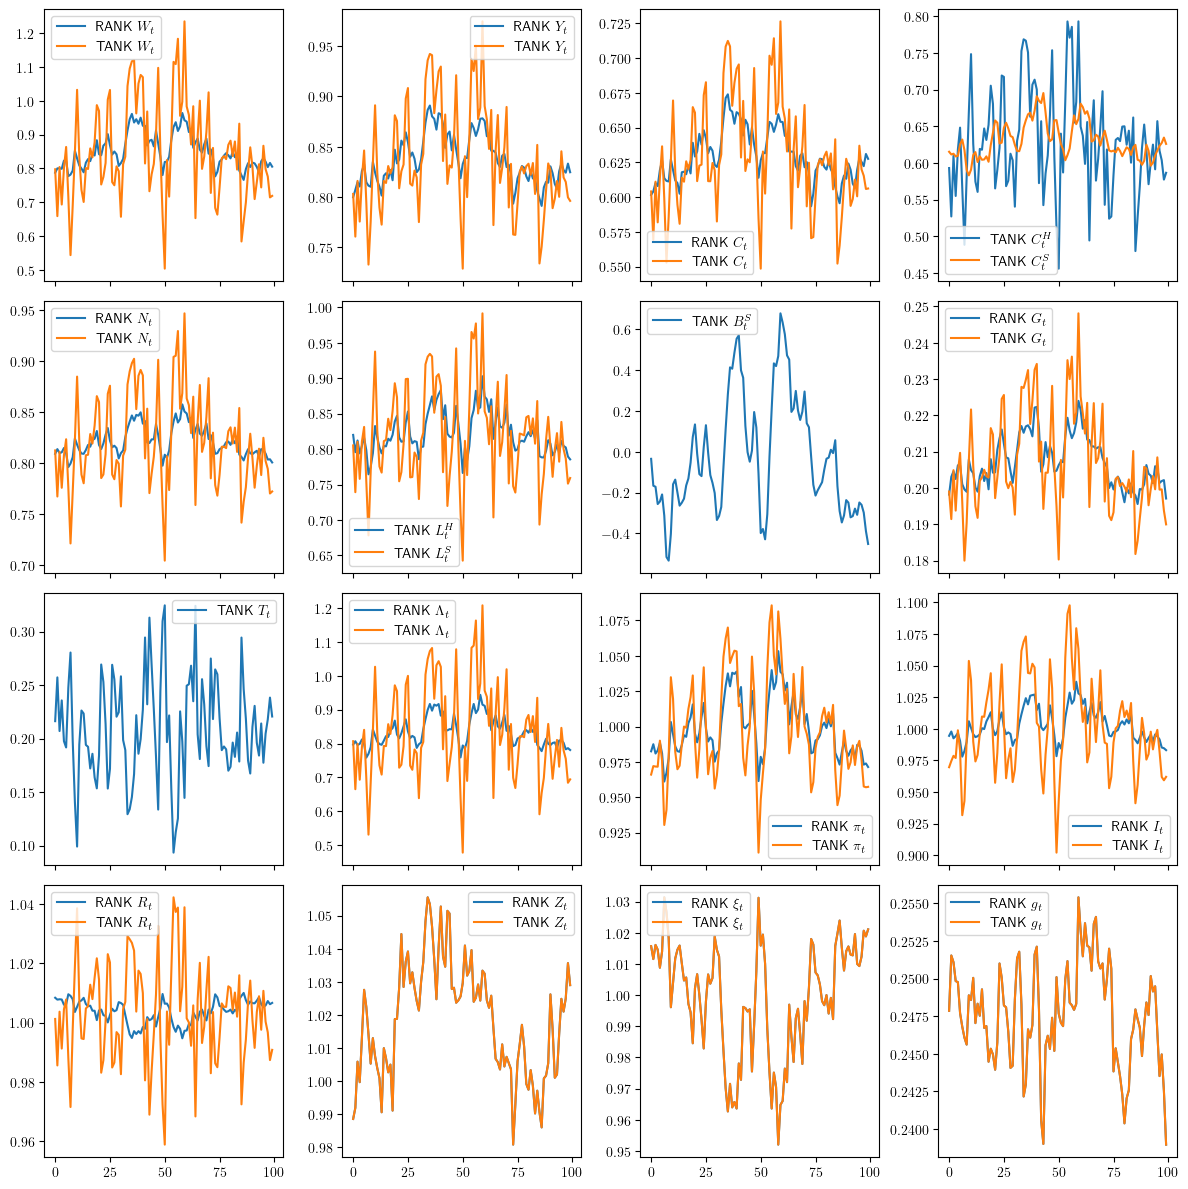

In [5]:
## Simulations
# params
T = 100
i = 2
seed = 1011

# rank variables
# 0: W, 1: Y, 2: C, 3: N, 4: G, 5: Lambda, 6: pi, 7: PA, 8: PB, 9: I, 10: R, 11: Z, 12: xi, 13: g
rank_show = [0, 1, 2, [], 3, [], [], 4, [], 5, 6, 9, 10, 11, 12, 13]

# tank variables
# 0: W, 1: Y, 2: C, 3: CH, 4: CS, 5: N, 6: LH, 7: LS, 8: BS, 9: G, 10: T, 11: Lambda, 12: pi, 13: PA, 14: PB, 15: I, 16: R, 17: Z, 18: xi, 19: g
tank_show = [0, 1, 2, [3, 4], 5, [6, 7], 8,  9, 10, 11, 12, 15, 16, 17, 18, 19]

# run irf
rank_sim = np.array(rank.run_simulation(T, seed=seed, pct=False, act=True))
tank_sim = np.array(tank.run_simulation(T, seed=seed, pct=False, act=True))

# plot
fig, ax = plt.subplots(4, 4, sharex=True)
fig.set_figwidth(12)
fig.set_figheight(12)

for i, show in enumerate(zip(rank_show, tank_show)):
    rs, ts = show
    ax.take(i).plot(rank_sim.T[:, rs], label=RANK.LABELS[rs])
    ax.take(i).plot(tank_sim.T[:, ts], label=TANK.LABELS[ts])
    ax.take(i).legend()

fig.tight_layout()

In [6]:
1/params.beta

1.0050251256281406